# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [139]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [140]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [141]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [142]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [144]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


In [145]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X=scaler.fit_transform(X)

<Figure size 640x480 with 0 Axes>

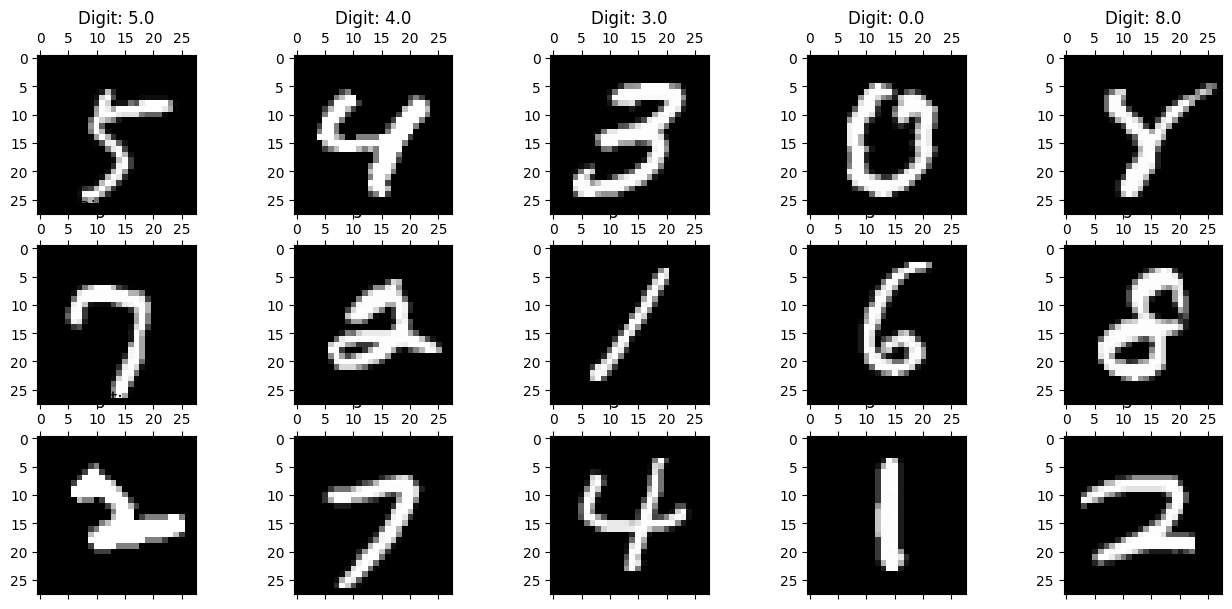

In [146]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [147]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

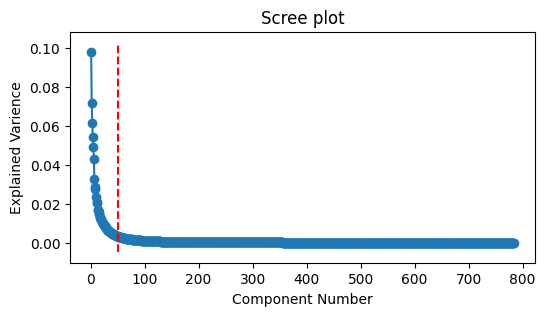

In [148]:
from sklearn.decomposition import PCA
from kneed import KneeLocator

pca=PCA()
X_train_pca=pca.fit_transform(X_train)

exp_var_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(6,3))
plt.plot(range(1,len(exp_var_ratio)+1), exp_var_ratio, marker='o')
plt.title('Scree plot')
plt.xlabel('Component Number')
plt.ylabel('Explained Varience')

kn = KneeLocator(range(1,len(exp_var_ratio)+1), exp_var_ratio, curve = 'convex', direction='decreasing')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='r')

plt.show()

In [149]:
print(kn.knee)

50


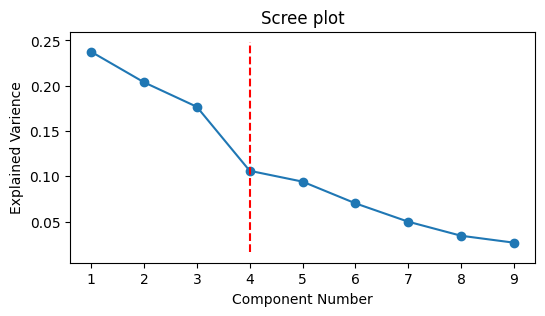

In [150]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda=LinearDiscriminantAnalysis()

#lda.fit_transtorm(X_train)과 더불어 np.ravel(y_train)도 함께 지정
X_train_lda=lda.fit_transform(X_train, np.ravel(y_train))

exp_var_ratio = lda.explained_variance_ratio_

plt.figure(figsize=(6,3))
plt.plot(range(1,len(exp_var_ratio)+1), exp_var_ratio, marker='o')
plt.title('Scree plot')
plt.xlabel('Component Number')
plt.ylabel('Explained Varience')

kn = KneeLocator(range(1,len(exp_var_ratio)+1), exp_var_ratio, curve = 'convex', direction='decreasing')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='r')

plt.show()

In [151]:
print(kn.knee)

4


- PCA: 50개
- LDA: 4개

In [152]:
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [153]:
lda=LinearDiscriminantAnalysis(n_components=5)
X_train_lda = lda.fit_transform(X_train, np.ravel(y_train))
X_test_lda = lda.transform(X_test)

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time
import warnings
warnings.filterwarnings('ignore')

In [155]:
logistic = LogisticRegression()
decision=DecisionTreeClassifier(max_depth=7)

In [156]:
print(X_train.shape)
print(X_test.shape)
print(X_train_pca.shape)
print(X_test_pca.shape)
print(X_train_lda.shape)
print(X_test_lda.shape)

(56000, 784)
(14000, 784)
(56000, 50)
(14000, 50)
(56000, 5)
(14000, 5)


### logistic regression

In [161]:
start_log_ori = time.time()
logistic_ori=logistic.fit(X_train,y_train)
end_log_ori = time.time()
pred_log_ori=logistic_ori.predict(X_test)
acc_log_ori=accuracy_score(y_test,pred_log_ori)
time_log_ori=end_log_ori-start_log_ori

start_log_pca = time.time()
logistic_pca=logistic.fit(X_train_pca,y_train)
end_log_pca = time.time()
pred_log_pca=logistic_pca.predict(X_test_pca)
acc_log_pca=accuracy_score(y_test,pred_log_pca)
time_log_pca=end_log_pca-start_log_pca

start_log_lda = time.time()
logistic_lda=logistic.fit(X_train_lda,y_train)
end_log_lda = time.time()
pred_log_lda=logistic_lda.predict(X_test_lda)
acc_log_lda=accuracy_score(y_test,pred_log_lda)
time_log_lda=end_log_lda-start_log_lda

### decision tree

In [162]:
start_dec_ori = time.time()
decision_ori=decision.fit(X_train,y_train)
end_dec_ori = time.time()
pred_dec_ori=decision_ori.predict(X_test)
acc_dec_ori=accuracy_score(y_test,pred_dec_ori)
time_dec_ori=end_dec_ori-start_dec_ori

start_dec_pca = time.time()
decision_pca=decision.fit(X_train_pca,y_train)
end_dec_pca = time.time()
pred_dec_pca=decision_pca.predict(X_test_pca)
acc_dec_pca=accuracy_score(y_test,pred_dec_pca)
time_dec_pca=end_dec_pca-start_dec_pca

start_dec_lda = time.time()
decision_lda=decision.fit(X_train_lda,y_train)
end_dec_lda = time.time()
pred_dec_lda=decision_lda.predict(X_test_lda)
acc_dec_lda=accuracy_score(y_test,pred_dec_lda)
time_dec_lda=end_dec_lda-start_dec_lda

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

In [163]:
print('accuracy of decision tree \noriginal:',acc_dec_ori,
      'PCA:', acc_dec_pca,
      'LDA:', acc_dec_lda)
print('accuracy of logistic \noriginal', acc_log_ori,
      'PCA:', acc_log_pca,
      'LDA:', acc_log_lda)

accuracy of decision tree 
original: 0.7837857142857143 PCA: 0.6967142857142857 LDA: 0.7850714285714285
accuracy of logistic 
original 0.9219285714285714 PCA: 0.9080714285714285 LDA: 0.8317857142857142


In [164]:
print('training time of decision tree \noriginal:', time_dec_ori,
      'PCA:', time_dec_pca,
      'LDA:', time_dec_lda)
print('training time of logistic \noriginal:', time_log_ori,
      'PCA:',time_log_pca,'LDA:',time_log_lda)

training time of decision tree 
original: 9.327319383621216 PCA: 4.11230731010437 LDA: 0.40671372413635254
training time of logistic 
original: 8.406357049942017 PCA: 3.0796947479248047 LDA: 1.726696252822876


- decision tree algorithm

정확도 측면에서는 PCA는 좋은 결과를 보이지 못하지만, LDA는 좋은 결과, 오히려 향상된 결과를 보여준다. 시간 측면에서는 PCA와 LDA 모두 학습 시간이 현저하게 줄어듦을 확인할 수 있고, 이를 통해 LDA에서 강점을 가짐을 알 수 있다.

- logistic regression algorithm

정확도 측면에서는 PCA와 LDA 모두 줄어드는 경향이 있다. 특히 LDA에서는 정확도가 확연히 떨어짐을 확인할 수 있다. 그렇지만 소요 시간은 줄어드는 효과를 지닐 수 있다.